# Neural Network
Neural networks — also called artificial neural networks — are a variety of deep learning technologies. 
Commercial applications of these technologies generally focus on solving complex signal processing or pattern recognition problems.
Neural networks are used to model complex relationships between inputs and outputs or to find patterns in data.


An Artificial Neural Network is made up of 3 components:
Input Layer– First is the input layer
Hidden Layer– The second type of layer is called the hidden layer
Output layer– The last type of layer is the output layer
A layer consists of small individual units called neurons.

Neural networks process past and current data to estimate future values — 
discovering any complex correlations hidden in the data.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('gas_turbines.csv')

In [3]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
df.head(2)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.0,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.0,114.72,10.598,3.2363,82.776


In [5]:
#EDA & Data preprocessing

In [6]:
df.shape

(15039, 11)

In [7]:
# Changing position of target column 'TEY'
Target = df['TEY']
#Drop the existing column
df.drop(labels=['TEY'], axis=1,inplace = True)
df.insert(0, 'Y', Target)

df = df.rename({'Y':'TEY'}, axis = 1)

df.head()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,114.70,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,114.72,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,114.71,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,114.72,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,114.72,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEY     15039 non-null  float64
 1   AT      15039 non-null  float64
 2   AP      15039 non-null  float64
 3   AH      15039 non-null  float64
 4   AFDP    15039 non-null  float64
 5   GTEP    15039 non-null  float64
 6   TIT     15039 non-null  float64
 7   TAT     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [9]:
df.describe()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
count,15039.000000,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,134.188464,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,12.102353,1.972499,68.190934
std,15.829717,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,1.103196,2.222206,10.470586
min,100.170000,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,9.904400,0.000388,27.765000
25%,127.985000,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,11.622000,0.858055,61.303500
50%,133.780000,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,12.025000,1.390200,66.601000
75%,140.895000,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,12.578000,2.160400,73.935500
max,174.610000,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,15.081000,44.103000,119.890000


In [10]:
df.isna().sum()

TEY     0
AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
dtype: int64

In [11]:
#correlation
df.corr()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
TEY,1.000000,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,0.988473,-0.541751,-0.102631
AT,-0.207495,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.100705,-0.088588,-0.600006
AP,0.146939,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.131198,0.041614,0.256744
AH,-0.110272,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.182010,0.165505,0.143061
AFDP,0.717995,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.727152,-0.334207,-0.037299
GTEP,0.977042,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.993784,-0.508259,-0.208496
TIT,0.891587,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.887238,-0.688272,-0.231636
TAT,-0.720356,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.744740,0.063404,0.009888
CDP,0.988473,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,1.000000,-0.520783,-0.169103
CO,-0.541751,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.520783,1.000000,0.316743


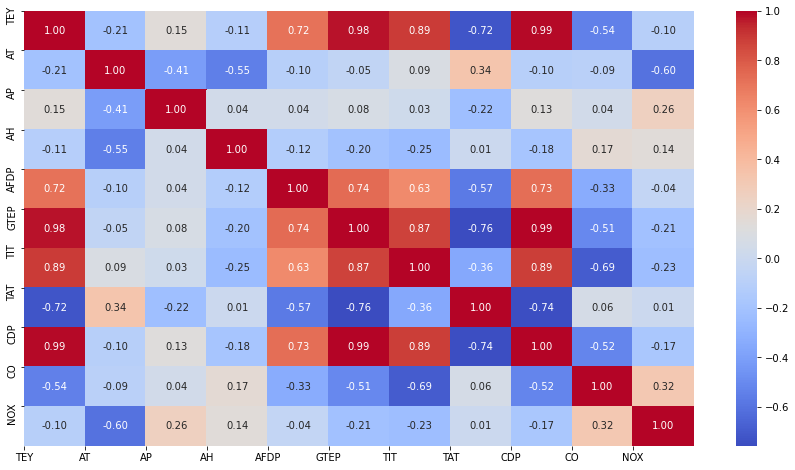

In [12]:
# Heatmap of correlation matrix
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [13]:
#Feature Selection

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [15]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [16]:
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [17]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

Feature 0: 0.402809
Feature 1: 0.146970
Feature 2: 0.091234
Feature 3: 0.657138
Feature 4: 1.591097
Feature 5: 1.302367
Feature 6: 0.911451
Feature 7: 1.709985
Feature 8: 0.506711
Feature 9: 0.303219


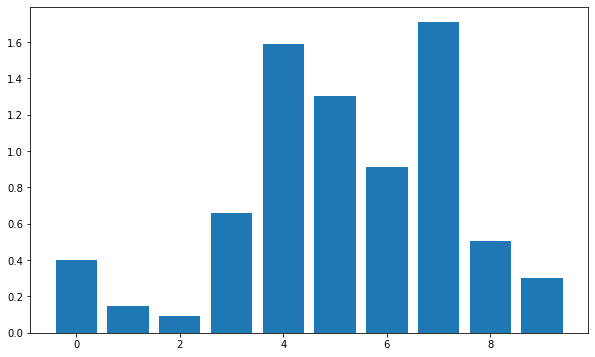

In [18]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [19]:
#we will select only features with good score to build our model.

In [20]:
X = df.drop(['TEY','AT','AP','AH','CO','NOX'], axis = 1)

In [21]:
Y = df.iloc[:,0]

In [22]:
# Standardizing data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [23]:
scaler.fit(X)

StandardScaler()

In [24]:
y = StandardScaler().fit_transform(y.values.reshape(len(y),1))[:,0]

In [25]:
scaled_features=scaler.transform(X)
df_head=pd.DataFrame(scaled_features,columns=X.columns)
df_head

,AFDP,GTEP,TIT,TAT,CDP
0,-0.921232,-1.379101,-1.488376,0.585240,-1.357331
1,-0.921495,-1.363528,-1.482325,0.585240,-1.363676
2,-0.944385,-1.351309,-1.476275,0.568715,-1.360957
3,-0.946884,-1.348194,-1.464173,0.583969,-1.356424
4,-0.924389,-1.354663,-1.458123,0.582698,-1.350985
...,...,...,...,...,...
15034,-0.865850,-1.498657,-2.063184,0.103453,-1.543161
15035,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247
15036,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922
15037,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598


In [26]:
# Splitting data into test data and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [27]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (10527, 5)
Shape of x_test:  (4512, 5)
Shape of y_train:  (10527,)
Shape of y_test:  (4512,)


In [28]:
#Neural Network Model - Backpropagation

In [29]:
from keras.models import Sequential
from keras.layers import Dense

In [30]:
# create model
model = Sequential()
model.add(Dense(10, input_dim=5, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(6, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))

In [31]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [32]:
# Fit the model
model.fit(x_train,y_train, epochs=100, batch_size=40)

Epoch 1/100
264/264 [==============================] - 1s 726us/step - loss: 1.0401 - mse: 1.0401
Epoch 2/100
264/264 [==============================] - 0s 741us/step - loss: 0.9942 - mse: 0.9942
Epoch 3/100
264/264 [==============================] - 0s 734us/step - loss: 0.9946 - mse: 0.9946
Epoch 4/100
264/264 [==============================] - 0s 867us/step - loss: 0.9951 - mse: 0.9951
Epoch 5/100
264/264 [==============================] - 0s 798us/step - loss: 0.9945 - mse: 0.9945
Epoch 6/100
264/264 [==============================] - 0s 802us/step - loss: 0.9943 - mse: 0.9943
Epoch 7/100
264/264 [==============================] - 0s 822us/step - loss: 0.9936 - mse: 0.9936
Epoch 8/100
264/264 [==============================] - 0s 791us/step - loss: 0.9955 - mse: 0.9955
Epoch 9/100
264/264 [==============================] - 0s 852us/step - loss: 0.9950 - mse: 0.9950
Epoch 10/100
264/264 [==============================] - 0s 764us/step - loss: 0.9952 - mse: 0.9952
Epoch 11/100
264/26

In [33]:
# evaluate the model
scores = model.evaluate(x_test, y_test)
print((model.metrics_names[1]))

141/141 [==============================] - 0s 771us/step - loss: 1.0177 - mse: 1.0177
mse


In [34]:
#Neural Network Model - Tuning of All Hyperparameters

In [35]:
#as there are too many records in dataset, we will use only first 500 records

In [36]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam_v2
from keras.layers import Dropout

In [37]:
X = df.drop(['TEY','AT','AP','AH','CO','NOX'], axis = 1)
y = df.iloc[:,0]

In [38]:
# Selecting first 500 records
X = X.iloc[0:500,:]
X

,AFDP,GTEP,TIT,TAT,CDP
0,3.5000,19.663,1059.2,550.00,10.605
1,3.4998,19.728,1059.3,550.00,10.598
2,3.4824,19.779,1059.4,549.87,10.601
3,3.4805,19.792,1059.6,549.99,10.606
4,3.4976,19.765,1059.7,549.98,10.612
...,...,...,...,...,...
495,4.8109,26.603,1077.1,538.35,12.218
496,3.8090,19.942,1037.0,536.56,10.478
497,3.7755,19.941,1036.2,535.80,10.582
498,3.9371,21.346,1042.7,535.17,10.999


In [39]:
# Selecting first 500 records
y = y.iloc[0:500]

In [40]:
y

0      114.70
1      114.72
2      114.71
3      114.72
4      114.72
        ...  
495    139.88
496    111.72
497    111.71
498    117.66
499    156.45
Name: TEY, Length: 500, dtype: float64

In [41]:
# Scaling all the features
scaler.fit(X)
y = StandardScaler().fit_transform(y.values.reshape(len(y),1))[:,0]

In [42]:
scaled_features=scaler.transform(X)
df_head=pd.DataFrame(scaled_features,columns=X.columns)
df_head

,AFDP,GTEP,TIT,TAT,CDP
0,-1.759902,-1.532845,-2.140879,0.597669,-1.637742
1,-1.760236,-1.516668,-2.132865,0.597669,-1.644533
2,-1.789273,-1.503977,-2.124851,0.584370,-1.641623
3,-1.792443,-1.500741,-2.108824,0.596646,-1.636771
4,-1.763907,-1.507461,-2.100811,0.595623,-1.630950
...,...,...,...,...,...
495,0.427695,0.194256,-0.706435,-0.594154,-0.072722
496,-1.244251,-1.463412,-3.919909,-0.777275,-1.760964
497,-1.300155,-1.463661,-3.984018,-0.855025,-1.660057
498,-1.030481,-1.114010,-3.463131,-0.919476,-1.255462


In [43]:
# Splitting data into test data and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [44]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (350, 5)
Shape of x_test:  (150, 5)
Shape of y_train:  (350,)
Shape of y_test:  (150,)


In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 5,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'linear'))
    
    adam=adam_v2.Adam(learning_rate = learning_rate)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse'])
    return model




# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)



# Define the grid search parameters

batch_size = [20,40]
epochs = [50,100]
learning_rate = [0.01,0.1]
dropout_rate = [0.1,0.2]
activation_function = ['relu','linear']
init = ['uniform','normal']
neuron1 = [4,8]
neuron2 = [2,4]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)


# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10, scoring='neg_mean_squared_error')
grid_result = grid.fit(x_train, y_train)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))


Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


<ipython-input-46-d0c99a71b412>:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


[CV 1/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.8s
[CV 2/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.8s
[CV 3/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.9s
[CV 4/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 1/256] END activation_function=relu, batch_size=20, dro

[CV 3/5; 5/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 4/5; 5/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 5/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 5/5; 5/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 5/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 1/5; 6/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 6/256] END activation_function=relu, batch_size=20, dropout_r

[CV 5/5; 10/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.6s
[CV 1/5; 11/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 11/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.9s
[CV 2/5; 11/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 11/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.8s
[CV 3/5; 11/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 11/256] END activation_function=relu, batch_size=20, dr

[CV 2/5; 16/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 3/5; 16/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 16/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 4/5; 16/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 16/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 5/5; 16/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 16/256] END activation_function=relu, batch_size=20, dropout_

[CV 4/5; 21/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.2s
[CV 5/5; 21/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 21/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.1s
[CV 1/5; 22/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 22/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.2s
[CV 2/5; 22/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 22/256] END activation_function=relu, batch_size=

[CV 1/5; 27/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.2s
[CV 2/5; 27/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 27/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.2s
[CV 3/5; 27/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 27/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.4s
[CV 4/5; 27/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 27/256] END activation_function=relu, batch_size=

[CV 3/5; 32/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.3s
[CV 4/5; 32/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 32/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.4s
[CV 5/5; 32/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 32/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.4s
[CV 1/5; 33/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 33/256] END activation_function=relu, batch_size=20, d

[CV 5/5; 37/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.0s
[CV 1/5; 38/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 38/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.8s
[CV 2/5; 38/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 38/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.9s
[CV 3/5; 38/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 38/256] END activation_function=relu, batch_size=20, dr

[CV 2/5; 43/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.9s
[CV 3/5; 43/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 43/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.8s
[CV 4/5; 43/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 43/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.9s
[CV 5/5; 43/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 43/256] END activation_function=relu, batch_size=20, dr

[CV 4/5; 48/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 5/5; 48/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 48/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 1/5; 49/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 49/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.1s
[CV 2/5; 49/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 49/256] END activation_function=relu, batch_size=20,

[CV 5/5; 53/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.2s
[CV 1/5; 54/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 54/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.3s
[CV 2/5; 54/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 54/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.3s
[CV 3/5; 54/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 54/256] END activation_function=relu, batch_size=

[CV 2/5; 59/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.3s
[CV 3/5; 59/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 59/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.2s
[CV 4/5; 59/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 59/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.2s
[CV 5/5; 59/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 59/256] END activation_function=relu, batch_size=

[CV 4/5; 64/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.0s
[CV 5/5; 64/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 64/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.1s
[CV 1/5; 65/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 65/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.4s
[CV 2/5; 65/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 65/256] END activation_function=relu, batch_size=40,

[CV 1/5; 70/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.3s
[CV 2/5; 70/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 70/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.3s
[CV 3/5; 70/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 70/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.3s
[CV 4/5; 70/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 70/256] END activation_function=relu, batch_size=40, dr

[CV 3/5; 75/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.3s
[CV 4/5; 75/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 75/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.3s
[CV 5/5; 75/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 75/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.3s
[CV 1/5; 76/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 76/256] END activation_function=relu, batch_size=40, dr

[CV 5/5; 80/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.3s
[CV 1/5; 81/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 81/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.5s
[CV 2/5; 81/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 81/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.6s
[CV 3/5; 81/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 81/256] END activation_function=relu, batch_si

[CV 1/5; 86/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.5s
[CV 2/5; 86/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 86/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.5s
[CV 3/5; 86/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 86/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.5s
[CV 4/5; 86/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 86/256] END activation_function=relu, batch_size=

[CV 3/5; 91/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.5s
[CV 4/5; 91/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 91/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.5s
[CV 5/5; 91/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 91/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 1/5; 92/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 92/256] END activation_function=relu, batch_size=

[CV 5/5; 96/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.5s
[CV 1/5; 97/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 97/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.3s
[CV 2/5; 97/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 97/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.3s
[CV 3/5; 97/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 97/256] END activation_function=relu, batch_size=4

[CV 2/5; 102/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.3s
[CV 3/5; 102/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 102/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.3s
[CV 4/5; 102/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 102/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.3s
[CV 5/5; 102/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 102/256] END activation_function=relu, batch_size

[CV 4/5; 107/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.3s
[CV 5/5; 107/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 107/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.3s
[CV 1/5; 108/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 108/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.3s
[CV 2/5; 108/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 108/256] END activation_function=relu, batch_size

[CV 1/5; 113/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.5s
[CV 2/5; 113/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 113/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.5s
[CV 3/5; 113/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 113/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.5s
[CV 4/5; 113/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 113/256] END activation_function=relu

[CV 2/5; 118/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.5s
[CV 3/5; 118/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 118/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.5s
[CV 4/5; 118/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 118/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.5s
[CV 5/5; 118/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 118/256] END activation_function=relu, batc

[CV 3/5; 123/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.5s
[CV 4/5; 123/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 123/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.5s
[CV 5/5; 123/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 123/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.5s
[CV 1/5; 124/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 124/256] END activation_function=relu, batc

[CV 5/5; 128/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.5s
[CV 1/5; 129/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 129/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.5s
[CV 2/5; 129/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 129/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.5s
[CV 3/5; 129/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 129/256] END activation_function=l

[CV 1/5; 134/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.6s
[CV 2/5; 134/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 134/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.5s
[CV 3/5; 134/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 134/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.6s
[CV 4/5; 134/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 134/256] END activation_function=line

[CV 2/5; 139/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.5s
[CV 3/5; 139/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 139/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.5s
[CV 4/5; 139/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 139/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.5s
[CV 5/5; 139/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 139/256] END activation_function=line

[CV 3/5; 144/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.5s
[CV 4/5; 144/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 144/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.5s
[CV 5/5; 144/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 144/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.5s
[CV 1/5; 145/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 145/256] END activation_function=linear,

[CV 4/5; 149/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.9s
[CV 5/5; 149/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 149/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.8s
[CV 1/5; 150/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 150/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.8s
[CV 2/5; 150/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 150/256] END activation_functio

[CV 5/5; 154/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.8s
[CV 1/5; 155/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 155/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.9s
[CV 2/5; 155/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 155/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.9s
[CV 3/5; 155/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 155/256] END activation_functio

[CV 1/5; 160/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.9s
[CV 2/5; 160/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 160/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.9s
[CV 3/5; 160/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 160/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.8s
[CV 4/5; 160/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 160/256] END activation_function=line

[CV 2/5; 165/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.5s
[CV 3/5; 165/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 165/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.5s
[CV 4/5; 165/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 165/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.5s
[CV 5/5; 165/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 165/256] END activation_function=line

[CV 3/5; 170/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.5s
[CV 4/5; 170/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 170/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.5s
[CV 5/5; 170/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 170/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.5s
[CV 1/5; 171/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 171/256] END activation_function=line

[CV 4/5; 175/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.5s
[CV 5/5; 175/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 175/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.6s
[CV 1/5; 176/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 176/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.5s
[CV 2/5; 176/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 176/256] END activation_function=linear, ba

[CV 5/5; 180/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.9s
[CV 1/5; 181/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 181/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.9s
[CV 2/5; 181/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 181/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.8s
[CV 3/5; 181/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 181/256] END activation_functi

[CV 1/5; 186/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.0s
[CV 2/5; 186/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 186/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.9s
[CV 3/5; 186/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5; 186/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.9s
[CV 4/5; 186/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 186/256] END activation_functio

[CV 2/5; 191/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.9s
[CV 3/5; 191/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 191/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.9s
[CV 4/5; 191/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 191/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.9s
[CV 5/5; 191/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 191/256] END activation_function=line

[CV 3/5; 196/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.4s
[CV 4/5; 196/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 196/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.4s
[CV 5/5; 196/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 196/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.4s
[CV 1/5; 197/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 197/256] END activation_function

[CV 4/5; 201/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.4s
[CV 5/5; 201/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 201/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.5s
[CV 1/5; 202/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 202/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.4s
[CV 2/5; 202/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 202/256] END activation_function=line

[CV 5/5; 206/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.4s
[CV 1/5; 207/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 207/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.3s
[CV 2/5; 207/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 207/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.4s
[CV 3/5; 207/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 207/256] END activation_function=linear, ba

[CV 1/5; 212/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 2/5; 212/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 212/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.5s
[CV 3/5; 212/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 212/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.5s
[CV 4/5; 212/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 212/256] END activation_f

[CV 2/5; 217/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 3/5; 217/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 217/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.5s
[CV 4/5; 217/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 217/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.6s
[CV 5/5; 217/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 217/256] END activation_functio

[CV 3/5; 222/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.6s
[CV 4/5; 222/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 222/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.8s
[CV 5/5; 222/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 222/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.6s
[CV 1/5; 223/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 223/256] END activation_function=line

[CV 4/5; 227/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.4s
[CV 5/5; 227/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 227/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.6s
[CV 1/5; 228/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 228/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.4s
[CV 2/5; 228/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 228/256] END activation_functio

[CV 5/5; 232/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.3s
[CV 1/5; 233/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 233/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.3s
[CV 2/5; 233/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 233/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.3s
[CV 3/5; 233/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 233/256] END activation_function=line

[CV 1/5; 238/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.4s
[CV 2/5; 238/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 238/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.4s
[CV 3/5; 238/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 238/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.3s
[CV 4/5; 238/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 238/256] END activation_function=linear, ba

[CV 2/5; 243/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.5s
[CV 3/5; 243/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 243/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.5s
[CV 4/5; 243/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 243/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.5s
[CV 5/5; 243/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 243/256] END activation_f

[CV 3/5; 248/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.6s
[CV 4/5; 248/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 248/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.6s
[CV 5/5; 248/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 248/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.5s
[CV 1/5; 249/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 249/256] END activation_functio

[CV 4/5; 253/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.5s
[CV 5/5; 253/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 253/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.5s
[CV 1/5; 254/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 254/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.5s
[CV 2/5; 254/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 254/256] END activation_function=line

In [47]:
# create model
final_model = Sequential()
final_model.add(Dense(4,input_dim = 5,kernel_initializer = 'uniform',activation = 'relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(2,input_dim = 4,kernel_initializer = 'uniform',activation = 'relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(1,activation = 'linear'))
    
adam=adam_v2.Adam(learning_rate = 0.01)

In [48]:
# Compile Model
final_model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse'])

In [49]:
# Fit the model
final_model.fit(x_train,y_train, epochs=50, batch_size=20)

Epoch 1/50
18/18 [==============================] - 0s 709us/step - loss: 1.0463 - mse: 1.0463
Epoch 2/50
18/18 [==============================] - 0s 535us/step - loss: 1.0002 - mse: 1.0002
Epoch 3/50
18/18 [==============================] - 0s 588us/step - loss: 0.9991 - mse: 0.9991
Epoch 4/50
18/18 [==============================] - 0s 573us/step - loss: 0.9996 - mse: 0.9996
Epoch 5/50
18/18 [==============================] - 0s 647us/step - loss: 0.9998 - mse: 0.9998
Epoch 6/50
18/18 [==============================] - 0s 588us/step - loss: 1.0018 - mse: 1.0018
Epoch 7/50
18/18 [==============================] - 0s 647us/step - loss: 1.0002 - mse: 1.0002
Epoch 8/50
18/18 [==============================] - 0s 588us/step - loss: 1.0006 - mse: 1.0006
Epoch 9/50
18/18 [==============================] - 0s 589us/step - loss: 0.9996 - mse: 0.9996
Epoch 10/50
18/18 [==============================] - 0s 589us/step - loss: 0.9993 - mse: 0.9993
Epoch 11/50
18/18 [==============================

In [50]:
scores = final_model.evaluate(x_test, y_test)
print((final_model.metrics_names[1]))

5/5 [==============================] - 0s 1ms/step - loss: 1.0067 - mse: 1.0067
mse
